1. There are only 12 columns with total wind generation, because they calculated it by themselves (I checked, it is just onshore + offshore, BUT, if there is a missing value in one of these, then wind generation will be also missing)

2. (from Offshore and Onshore Wind Generation). PT wind generation is almost empty (only 3 months of data), because PT_wind_offshore_generation_actual  2892 non-null.


3. Top European countries wind generation (2022, Statista): Germany, UK, Spain, France, (Turkey), Sweden, Netherlands, Italy

# 1. First analysis of dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: delete cet_cest_timestamp
# TODO 1: Only plot for training data
# TODO 2: Perform tests only on train data

data = pd.read_csv('time_series_60min_singleindex_filtered_no_price_no_forecast.csv')#, parse_dates=True)

# Prepare date column
data = data.rename(columns={'utc_timestamp': 'date'})
data['date'] = pd.to_datetime(data['date']).dt.tz_localize(None)
data = data.set_index('date').drop(['cet_cest_timestamp'], axis=1)

data.head()

AT_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              5946.0   
2015-01-01 01:00:00                              5726.0   
2015-01-01 02:00:00                              5347.0   
2015-01-01 03:00:00                              5249.0   

                     AT_solar_generation_actual  \
date                                              
2014-12-31 23:00:00                         NaN   
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   

                     AT_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                               69.0   
2015-01-01 01:00:00                               64.0   
2015-01-01 02:00:00                               65.0   
2015-01-01 03:00:00                               64.0   

                     BE_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              9484.0   
2015-01-01 01:00:00                              9152.0   
2015-01-01 02:00:00                              8799.0   
2015-01-01 03:00:00                              8567.0   

                     BE_solar_generation_actual  BE_wind_generation_actual  \
date                                                                         
2014-12-31 23:00:00                         NaN                        NaN   
2015-01-01 00:00:00                         NaN                        NaN   
2015-01-01 01:00:00                         NaN                     734.81   
2015-01-01 02:00:00                         NaN                     766.64   
2015-01-01 03:00:00                         NaN                     733.13   

                     BE_wind_offshore_generation_actual  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              518.66   
2015-01-01 02:00:00                              529.46   
2015-01-01 03:00:00                              406.94   

                     BE_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                                NaN   
2015-01-01 01:00:00                             216.15   
2015-01-01 02:00:00                             237.18   
2015-01-01 03:00:00                             326.19   

                     BG_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              4585.0   
2015-01-01 02:00:00                              4440.0   
2015-01-01 03:00:00                              4418.0   

                     BG_solar_generation_actual  ...  \
date                                             ...   
2014-12-31 23:00:00                         NaN  ...   
2015-01-01 00:00:00                         NaN  ...   
2015-01-01 01:00:00                         NaN  ...   
2015-01-01 02:00:00                         NaN  ...   
2015-01-01 03:00:00                         NaN  ...   

                     SE_3_wind_onshore_generation_actual  \
date                                                       
2014-12-31 23:00:00                                  NaN   
2015-01-01 00:00:00                                  NaN   
2015-01-01 01

Count columns that contain word load, solar and wind.
Wind has the biggest number of columns, because it is divided into offshore and onshore.
However, not all countries have offshore wind generation.

In [3]:
cols_load = [col for col in data.columns if 'load' in col]
cols_solar = [col for col in data.columns if 'solar' in col]
cols_wind = [col for col in data.columns if 'wind' in col]
print(f'Number of load columns: {len(cols_load)}\nNumber of solar columns: {len(cols_solar)}\nNumber of wind columns: {len(cols_wind)}')

Number of load columns: 57
Number of solar columns: 47
Number of wind columns: 105


List of countries that contain onshore and offshore generation.
They are then summed up to the "total wind generation".

In [4]:
cols_wind_generation = [col for col in cols_wind if 'wind_generation' in col]
cols_wind_generation

['BE_wind_generation_actual',
 'DE_wind_generation_actual',
 'DE_50hertz_wind_generation_actual',
 'DE_LU_wind_generation_actual',
 'DE_tennet_wind_generation_actual',
 'DK_wind_generation_actual',
 'DK_1_wind_generation_actual',
 'DK_2_wind_generation_actual',
 'GB_GBN_wind_generation_actual',
 'GB_UKM_wind_generation_actual',
 'NL_wind_generation_actual',
 'PT_wind_generation_actual']

In [5]:
# So, they reported as total generation only columns that have onshore and offshore generation
cols_wind_offshore_generation = [col for col in cols_wind if 'wind_offshore_generation' in col]
cols_wind_offshore_generation

['BE_wind_offshore_generation_actual',
 'DE_wind_offshore_generation_actual',
 'DE_50hertz_wind_offshore_generation_actual',
 'DE_LU_wind_offshore_generation_actual',
 'DE_tennet_wind_offshore_generation_actual',
 'DK_wind_offshore_generation_actual',
 'DK_1_wind_offshore_generation_actual',
 'DK_2_wind_offshore_generation_actual',
 'GB_GBN_wind_offshore_generation_actual',
 'GB_UKM_wind_offshore_generation_actual',
 'NL_wind_offshore_generation_actual',
 'PT_wind_offshore_generation_actual']

Calculate how many mismatches between sum of offshore and onshore, and their respective "total" wind generation.

In [6]:
check_sums = ['BE', 'DE', 'DE_50hertz', 'DE_LU', 'DE_tennet', 'DK_1', 'DK_2', 'GB_GBN', 'GB_UKM', 'NL', 'PT']

num_mismatch_sum = 0

for area in check_sums:
    offshore_col = f"{area}_wind_offshore_generation_actual"
    onshore_col = f"{area}_wind_onshore_generation_actual"
    generation_col = f"{area}_wind_generation_actual"

    # Check for missing values in offshore_col and onshore_col
    non_missing_values = (~data[offshore_col].isnull() & ~data[onshore_col].isnull())
    
    # Check whether the sum of offshore_col and onshore_col equals generation_col only when both are non-missing
    mismatch_condition = (((data[offshore_col] + data[onshore_col]).round(2) != data[generation_col]) & non_missing_values)
    
    # Count the number of mismatches
    num_mismatch = mismatch_condition.sum()
    
    print(f"Number of mismatches for {area}: {num_mismatch}")
    num_mismatch_sum += num_mismatch

print(f"Total number of rows where the sum is not equal: {num_mismatch_sum}")


Number of mismatches for BE: 303
Number of mismatches for DE: 12591
Number of mismatches for DE_50hertz: 11832
Number of mismatches for DE_LU: 4341
Number of mismatches for DE_tennet: 12822
Number of mismatches for DK_1: 6
Number of mismatches for DK_2: 10
Number of mismatches for GB_GBN: 13890
Number of mismatches for GB_UKM: 12509
Number of mismatches for NL: 11766
Number of mismatches for PT: 0
Total number of rows where the sum is not equal: 80070


Max difference between sum of onshore and offshore, and their respective "total" wind generation column.

In [7]:
from numpy.testing import assert_almost_equal

# Iterate over each area
for area in check_sums:
    offshore_col = f"{area}_wind_offshore_generation_actual"
    onshore_col = f"{area}_wind_onshore_generation_actual"
    generation_col = f"{area}_wind_generation_actual"
    
    # Filter the DataFrame based on non-missing values in both offshore and onshore columns
    non_missing_values = ~data[[offshore_col, onshore_col]].isnull().any(axis=1)
    filtered_data = data[non_missing_values]
    
    # Calculate the sum of offshore and onshore columns
    sum_offshore_onshore = filtered_data[offshore_col] + filtered_data[onshore_col]
    
    # Calculate the difference between the sum of offshore and onshore and generation columns
    diff = sum_offshore_onshore - filtered_data[generation_col]

    print(f'Max difference for {area}:', diff.max())
    print(f'Min difference for {area}:', diff.min())
    
    # Assert that the difference is almost equal to zero
    # assert_almost_equal(diff.values, 0)

Max difference for BE: 3.000195647473447e-09
Min difference for BE: -2.9999682737980038e-09
Max difference for DE: 1.0
Min difference for DE: -69.0
Max difference for DE_50hertz: 1.0
Min difference for DE_50hertz: -1.0
Max difference for DE_LU: 1.0
Min difference for DE_LU: -1.0
Max difference for DE_tennet: 1.0
Min difference for DE_tennet: -1.0
Max difference for DK_1: 2.9999682737980038e-09
Min difference for DK_1: -2.9999682737980038e-09
Max difference for DK_2: 1.0001031114370562e-09
Min difference for DK_2: -1.0001031114370562e-09
Max difference for GB_GBN: 1.0
Min difference for GB_GBN: -1.0
Max difference for GB_UKM: 10.0
Min difference for GB_UKM: -1.0
Max difference for NL: 1.0
Min difference for NL: -1.0
Max difference for PT: 4.547473508864641e-13
Min difference for PT: -4.547473508864641e-13


 Check, maximum missing values (in offshore or onshore) with "total" wind generation missing. 
 They are the same (except GB_UKM).

In [8]:
for area in check_sums:
    max_missing = max(data[f"{area}_wind_offshore_generation_actual"].isna().sum(), data[f"{area}_wind_onshore_generation_actual"].isna().sum())
    ready_col = data[f"{area}_wind_generation_actual"].isnull().sum()
    print(f"{area} max missing in offshore or onshore: {max_missing}, total col: {ready_col}")

BE max missing in offshore or onshore: 3935, total col: 3935
DE max missing in offshore or onshore: 75, total col: 75
DE_50hertz max missing in offshore or onshore: 1, total col: 1
DE_LU max missing in offshore or onshore: 32855, total col: 32855
DE_tennet max missing in offshore or onshore: 1, total col: 1
DK_1 max missing in offshore or onshore: 3, total col: 3
DK_2 max missing in offshore or onshore: 3, total col: 3
GB_GBN max missing in offshore or onshore: 41, total col: 41
GB_UKM max missing in offshore or onshore: 128, total col: 129
NL max missing in offshore or onshore: 1967, total col: 1967
PT max missing in offshore or onshore: 47509, total col: 47509


# 2. Analysis of countries and zones in dataset

In [9]:
data_areas = pd.read_csv('areas.csv')

In [10]:
data_areas.head()

area ID ISO 3166-1 alpha-2 MapCode ENTSO-E primary AreaName ENTSO-E  \
0      AT                 AT              AT                  Austria   
1      BA                 BA             NaN                      NaN   
2      BE                 BE              BE                  Belgium   
3      BG                 BG              BG                 Bulgaria   
4      CH                 CH              CH              Switzerland   

  primary concept  EU memberstate  EU inside  15min  30min 60min  ...  \
0         country            True       True   True  False  True  ...   
1         country           False      False  False  False  True  ...   
2         country            True       True  False  False  True  ...   
3         country            True       True  False  False  True  ...   
4         country           False      False  False  False  True  ...   

  control area market balance area load from ENTSO-E TP  \
0          APG                 APG                 True   
1      NOS BiH             NOS BiH                False   
2         Elia                Elia                 True   
3          ESO                 ESO                 True   
4    swissgrid           swissgrid                 True   

  generation from ENTSOE-TP price from ENTSO-E TP generation from TSO  \
0                      True                  True                True   
1                     False                 False               False   
2                      True                 False               False   
3                      True                 False               False   
4                      True                 False               False   

  price from TSO  load from ENTSO-E data portal  load from TSO  \
0          False                           True          False   
1          False                           True          False   
2          False                           True          False   
3          False                           True          False   
4          False                           True          False   

   Capacity from OPSD  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 25 columns]

The dataset contains the data on countries level, as well as other levels.

In [11]:
data_areas['primary concept'].unique()

array(['country', 'control area', 'bidding zone', 'region',
       'market balance area', 'bidding zone aggregation'], dtype=object)

82 unique area IDs in the dataset.

In [12]:
len(data_areas['area ID'].unique())

82

In [13]:
data_areas_filtered =data_areas.query('`primary concept`=="country" and `primary AreaName ENTSO-E`.notnull()')[['area ID', 'primary AreaName ENTSO-E']].reset_index(drop=True)
data_areas_filtered

area ID               primary AreaName ENTSO-E
0       AT                                Austria
1       BE                                Belgium
2       BG                               Bulgaria
3       CH                            Switzerland
4       CY                                 Cyprus
5       CZ                         Czech Republic
6       DE                                Germany
7       DK                                Denmark
8       EE                                Estonia
9       ES                                  Spain
10      FI                                Finland
11      FR                                 France
12  GB_UKM                         United Kingdom
13  GB_GBN                       National Grid BZ
14  GB_NIR                                SONI CA
15      GR                                 Greece
16      HR                                Croatia
17      HU                                Hungary
18      IE                                Ireland
19      IT                                  Italy
20      LT                              Lithuania
21      LU                             Luxembourg
22      LV                                 Latvia
23      ME                             Montenegro
24      MK  Former Yugoslav Republic of Macedonia
25      NL                            Netherlands
26      NO                                 Norway
27      PL                                 Poland
28      PT                               Portugal
29      RO                                Romania
30      RS                                 Serbia
31      SE                                 Sweden
32      SI                               Slovenia
33      SK                               Slovakia
34      MT                                  Malta
35      UA                                Ukraine

In [81]:
# Query that does not exclude Luxembourg, UA and MT
data_filter = data_areas.query(
    '(`primary concept`!="country" \
      or `primary AreaName ENTSO-E`.isnull()) \
      and `area ID`.notnull()')['area ID'].unique()
data_filter

array(['BA', 'CS', 'DE_50hertz', 'DE_amprion', 'DE_tennet',
       'DE_transnetbw', 'DE_AT_LU', 'DK_1', 'DK_2', 'DK_energinet',
       'GB_EAW', 'GB_SCT', 'IE_sem', 'IS', 'IT_BRNN', 'IT_CNOR',
       'IT_CSUD', 'IT_FOGN', 'IT_GR', 'IT_NORD', 'IT_NORD_AT',
       'IT_NORD_CH', 'IT_NORD_FR', 'IT_NORD_SI', 'IT_PRGP', 'IT_ROSN',
       'IT_SACO_AC', 'IT_SACO_DC', 'IT_SARD', 'IT_SICI', 'IT_SUD', 'NO_1',
       'NO_2', 'NO_3', 'NO_4', 'NO_5', 'SE_1', 'SE_2', 'SE_3', 'SE_4',
       'AL', 'DE_LU', 'TR', 'UA_west', 'UA_east'], dtype=object)

In [82]:
# exclude non-countries
v_to_delete = ['GB_NIR', 'GB_GBN']

# to keep ttrack of countries in dataset
data_areas_filtered = data_areas_filtered[~data_areas_filtered['area ID'].isin(v_to_delete)].reset_index(drop=True)
data_filter = np.append(data_filter, v_to_delete) 

In [84]:
columnVals = data.columns.map(lambda x: x.startswith(tuple(data_filter)))
filtered_data = data.loc[:, ~columnVals].copy()

In [87]:
filtered_data.head()

AT_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              5946.0   
2015-01-01 01:00:00                              5726.0   
2015-01-01 02:00:00                              5347.0   
2015-01-01 03:00:00                              5249.0   

                     AT_solar_generation_actual  \
date                                              
2014-12-31 23:00:00                         NaN   
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   

                     AT_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                               69.0   
2015-01-01 01:00:00                               64.0   
2015-01-01 02:00:00                               65.0   
2015-01-01 03:00:00                               64.0   

                     BE_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              9484.0   
2015-01-01 01:00:00                              9152.0   
2015-01-01 02:00:00                              8799.0   
2015-01-01 03:00:00                              8567.0   

                     BE_solar_generation_actual  BE_wind_generation_actual  \
date                                                                         
2014-12-31 23:00:00                         NaN                        NaN   
2015-01-01 00:00:00                         NaN                        NaN   
2015-01-01 01:00:00                         NaN                     734.81   
2015-01-01 02:00:00                         NaN                     766.64   
2015-01-01 03:00:00                         NaN                     733.13   

                     BE_wind_offshore_generation_actual  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              518.66   
2015-01-01 02:00:00                              529.46   
2015-01-01 03:00:00                              406.94   

                     BE_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                                NaN   
2015-01-01 01:00:00                             216.15   
2015-01-01 02:00:00                             237.18   
2015-01-01 03:00:00                             326.19   

                     BG_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              4585.0   
2015-01-01 02:00:00                              4440.0   
2015-01-01 03:00:00                              4418.0   

                     BG_solar_generation_actual  ...  \
date                                             ...   
2014-12-31 23:00:00                         NaN  ...   
2015-01-01 00:00:00                         NaN  ...   
2015-01-01 01:00:00                         NaN  ...   
2015-01-01 02:00:00                         NaN  ...   
2015-01-01 03:00:00                         NaN  ...   

                     SE_wind_offshore_capacity  SE_wind_onshore_capacity  \
date                                                                       
2014-12-31 23:00:00                        NaN                       NaN   
2015-01-01 00:00:00      

How many countries have wind_generation and offshore generation columns?

In [91]:
[col for col in filtered_data.columns if 'wind_generation' in col]

['BE_wind_generation_actual',
 'DE_wind_generation_actual',
 'DK_wind_generation_actual',
 'GB_UKM_wind_generation_actual',
 'NL_wind_generation_actual',
 'PT_wind_generation_actual']

In [92]:
[col for col in filtered_data.columns if 'wind_offshore_generation' in col]

['BE_wind_offshore_generation_actual',
 'DE_wind_offshore_generation_actual',
 'DK_wind_offshore_generation_actual',
 'GB_UKM_wind_offshore_generation_actual',
 'NL_wind_offshore_generation_actual',
 'PT_wind_offshore_generation_actual']

# 3. Missing values Analysis

## 3.1 Filter countries by number ofmissing values.

1. We saw earlier that not all the countries have offshore generation, but just few of them.

From the dataset we can see that Portugal has 94% of missings in those columns, leaving us with small period of observations.
Therefore, we can exclude analysis of these columns in Portugal.

2. As we can see, HR(Croatia) has almost 100% missing values in solar and wind_onshore columns. -> Exclude this country from analysis.

We can also exclude Poland, Hungary, Slovakia, Montenegro, Ukraine and Cyprus, because they have more than 30% of missings.

3. We want to have "consistent" countries, in other words, with the same columns and same time period.

In [99]:
# Missing values
missing_values = filtered_data.isnull()

# Calculate percentage of missing values in each column
percentage_missing = (missing_values.sum() / len(filtered_data)) * 100

# Print or inspect the percentage of missing values
print(percentage_missing[percentage_missing >= 30].sort_values(ascending=False))


PT_wind_generation_actual             94.262019
PT_wind_offshore_generation_actual    94.262019
dtype: float64


In [94]:
percentage_missing[percentage_missing >= 30].count()

10

In [107]:
v_to_delete = ['HR', 'PL', 'HU', 'SK', 'ME', 'UA', 'CY']

# to keep ttrack of countries in dataset
data_areas_filtered = data_areas_filtered[~data_areas_filtered['area ID'].isin(v_to_delete)].reset_index(drop=True)
columnVals = filtered_data.columns.map(lambda x: x.startswith(tuple(v_to_delete)))
filtered_data = filtered_data.loc[:, ~columnVals].copy()

In [108]:
filtered_data.head()

AT_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              5946.0   
2015-01-01 01:00:00                              5726.0   
2015-01-01 02:00:00                              5347.0   
2015-01-01 03:00:00                              5249.0   

                     AT_solar_generation_actual  \
date                                              
2014-12-31 23:00:00                         NaN   
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   

                     AT_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                               69.0   
2015-01-01 01:00:00                               64.0   
2015-01-01 02:00:00                               65.0   
2015-01-01 03:00:00                               64.0   

                     BE_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              9484.0   
2015-01-01 01:00:00                              9152.0   
2015-01-01 02:00:00                              8799.0   
2015-01-01 03:00:00                              8567.0   

                     BE_solar_generation_actual  BE_wind_generation_actual  \
date                                                                         
2014-12-31 23:00:00                         NaN                        NaN   
2015-01-01 00:00:00                         NaN                        NaN   
2015-01-01 01:00:00                         NaN                     734.81   
2015-01-01 02:00:00                         NaN                     766.64   
2015-01-01 03:00:00                         NaN                     733.13   

                     BE_wind_offshore_generation_actual  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              518.66   
2015-01-01 02:00:00                              529.46   
2015-01-01 03:00:00                              406.94   

                     BE_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                                NaN   
2015-01-01 01:00:00                             216.15   
2015-01-01 02:00:00                             237.18   
2015-01-01 03:00:00                             326.19   

                     BG_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              4585.0   
2015-01-01 02:00:00                              4440.0   
2015-01-01 03:00:00                              4418.0   

                     BG_solar_generation_actual  ...  \
date                                             ...   
2014-12-31 23:00:00                         NaN  ...   
2015-01-01 00:00:00                         NaN  ...   
2015-01-01 01:00:00                         NaN  ...   
2015-01-01 02:00:00                         NaN  ...   
2015-01-01 03:00:00                         NaN  ...   

                     RO_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                                NaN   
2015-01-01 01:00:00  

In [109]:
# remove PT wind_generation, PT wind_offshore_generation columns 
filtered_data = filtered_data.drop(columns=['PT_wind_generation_actual', 'PT_wind_offshore_generation_actual'])

KeyError: "['PT_wind_generation_actual', 'PT_wind_offshore_generation_actual'] not found in axis"

In [110]:
data_areas_filtered

area ID               primary AreaName ENTSO-E
0       AT                                Austria
1       BE                                Belgium
2       BG                               Bulgaria
3       CH                            Switzerland
4       CZ                         Czech Republic
5       DE                                Germany
6       DK                                Denmark
7       EE                                Estonia
8       ES                                  Spain
9       FI                                Finland
10      FR                                 France
11  GB_UKM                         United Kingdom
12      GR                                 Greece
13      IE                                Ireland
14      IT                                  Italy
15      LT                              Lithuania
16      LU                             Luxembourg
17      LV                                 Latvia
18      MK  Former Yugoslav Republic of Macedonia
19      NL                            Netherlands
20      NO                                 Norway
21      PT                               Portugal
22      RO                                Romania
23      RS                                 Serbia
24      SE                                 Sweden
25      SI                               Slovenia
26      MT                                  Malta

In [112]:
97 - 26*3

19

26*3

In [44]:
"""
1. Countries that load and generation from ENTSOE-TP
(here we filter on countries, delete regions)

2. Create df with ENTSOE code mapping and countries names
"""

# 31 "countries"
data_entsoe = data_areas.query(
    '`load from ENTSO-E TP` ==True \
      and `generation from ENTSOE-TP`==True \
      and `primary concept`=="country"')

countries = pd.DataFrame({'Area_ID': data_entsoe['area ID'].values,
                           'Country': data_entsoe['primary AreaName ENTSO-E'].values})

countries

Area_ID                                Country
0       AT                                Austria
1       BE                                Belgium
2       BG                               Bulgaria
3       CH                            Switzerland
4       CY                                 Cyprus
5       CZ                         Czech Republic
6       DE                                Germany
7       DK                                Denmark
8       EE                                Estonia
9       ES                                  Spain
10      FI                                Finland
11      FR                                 France
12  GB_UKM                         United Kingdom
13  GB_GBN                       National Grid BZ
14  GB_NIR                                SONI CA
15      GR                                 Greece
16      HU                                Hungary
17      IE                                Ireland
18      IT                                  Italy
19      LT                              Lithuania
20      LV                                 Latvia
21      ME                             Montenegro
22      MK  Former Yugoslav Republic of Macedonia
23      NL                            Netherlands
24      NO                                 Norway
25      PL                                 Poland
26      PT                               Portugal
27      RO                                Romania
28      SE                                 Sweden
29      SI                               Slovenia
30      SK                               Slovakia

In [48]:
# Delete non-countries
countries_filtered = countries.query('Area_ID not in ["GB_GBN", "GB_NIR"]').reset_index(drop=True)

In [49]:
countries_filtered

Area_ID                                Country
0       AT                                Austria
1       BE                                Belgium
2       BG                               Bulgaria
3       CH                            Switzerland
4       CY                                 Cyprus
5       CZ                         Czech Republic
6       DE                                Germany
7       DK                                Denmark
8       EE                                Estonia
9       ES                                  Spain
10      FI                                Finland
11      FR                                 France
12  GB_UKM                         United Kingdom
13      GR                                 Greece
14      HU                                Hungary
15      IE                                Ireland
16      IT                                  Italy
17      LT                              Lithuania
18      LV                                 Latvia
19      ME                             Montenegro
20      MK  Former Yugoslav Republic of Macedonia
21      NL                            Netherlands
22      NO                                 Norway
23      PL                                 Poland
24      PT                               Portugal
25      RO                                Romania
26      SE                                 Sweden
27      SI                               Slovenia
28      SK                               Slovakia

In [70]:
# Query that excludes Luxembourg, UA and MT

data_filter = data_areas.query(
    '(`primary concept`!="country" \
      or `load from ENTSO-E TP` !=True \
      or `generation from ENTSOE-TP`!=True) \
      and `area ID`.notnull()')['area ID'].unique()
# .join(
#          data_areas.query('`ISO 3166-1 alpha-2`'))
data_filter

array(['BA', 'CS', 'DE_50hertz', 'DE_amprion', 'DE_tennet',
       'DE_transnetbw', 'DE_AT_LU', 'DK_1', 'DK_2', 'DK_energinet',
       'GB_EAW', 'GB_SCT', 'HR', 'IE_sem', 'IS', 'IT_BRNN', 'IT_CNOR',
       'IT_CSUD', 'IT_FOGN', 'IT_GR', 'IT_NORD', 'IT_NORD_AT',
       'IT_NORD_CH', 'IT_NORD_FR', 'IT_NORD_SI', 'IT_PRGP', 'IT_ROSN',
       'IT_SACO_AC', 'IT_SACO_DC', 'IT_SARD', 'IT_SICI', 'IT_SUD', 'LU',
       'NO_1', 'NO_2', 'NO_3', 'NO_4', 'NO_5', 'RS', 'SE_1', 'SE_2',
       'SE_3', 'SE_4', 'AL', 'DE_LU', 'MT', 'TR', 'UA', 'UA_west',
       'UA_east'], dtype=object)

In [224]:
columnVals = data.columns.map(lambda x: x.startswith(tuple(data_filter)))
columnVals

Index([False, False, False, False, False, False, False, False, False, False,
       ...
       False, False, False, False, False, False, False, False, False, False],
      dtype='bool', length=127)

In [225]:
data = data.loc[:, ~columnVals]

In [236]:
suffixes_to_keep = ['date', '_load_actual_entsoe_transparency', '_solar_generation_actual', '_wind_generation_actual', '_wind_onshore_generation_actual', '_wind_offshore_generation_actual']

# Filter columns based on suffixes
filtered_columns = [col for col in data.columns if col.endswith(tuple(suffixes_to_keep))]

# Select only the filtered columns in the DataFrame
filtered_data = data[filtered_columns]
filtered_data

AT_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              5946.0   
2015-01-01 01:00:00                              5726.0   
2015-01-01 02:00:00                              5347.0   
2015-01-01 03:00:00                              5249.0   
...                                                 ...   
2020-09-30 19:00:00                              6661.0   
2020-09-30 20:00:00                              6336.0   
2020-09-30 21:00:00                              5932.0   
2020-09-30 22:00:00                              5628.0   
2020-09-30 23:00:00                              5395.0   

                     AT_solar_generation_actual  \
date                                              
2014-12-31 23:00:00                         NaN   
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   
...                                         ...   
2020-09-30 19:00:00                         NaN   
2020-09-30 20:00:00                         NaN   
2020-09-30 21:00:00                         NaN   
2020-09-30 22:00:00                         NaN   
2020-09-30 23:00:00                         NaN   

                     AT_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                               69.0   
2015-01-01 01:00:00                               64.0   
2015-01-01 02:00:00                               65.0   
2015-01-01 03:00:00                               64.0   
...                                                ...   
2020-09-30 19:00:00                             1847.0   
2020-09-30 20:00:00                             1723.0   
2020-09-30 21:00:00                             1771.0   
2020-09-30 22:00:00                             1779.0   
2020-09-30 23:00:00                             1661.0   

                     BE_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              9484.0   
2015-01-01 01:00:00                              9152.0   
2015-01-01 02:00:00                              8799.0   
2015-01-01 03:00:00                              8567.0   
...                                                 ...   
2020-09-30 19:00:00                              9402.0   
2020-09-30 20:00:00                              9219.0   
2020-09-30 21:00:00                              8763.0   
2020-09-30 22:00:00                              8131.0   
2020-09-30 23:00:00                              7837.0   

                     BE_solar_generation_actual  BE_wind_generation_actual  \
date                                                                         
2014-12-31 23:00:00                         NaN                        NaN   
2015-01-01 00:00:00                         NaN                        NaN   
2015-01-01 01:00:00                         NaN                     734.81   
2015-01-01 02:00:00                         NaN                     766.64   
2015-01-01 03:00:00                         NaN                     733.13   
...                                         ...                        ...   
2020-09-30 19:00:00                         NaN                    1889.72   
2020-09-30 20:00:00                         NaN                    2154.67   
2020-09-30 21:00:00                         NaN                    2187.48   
2020-09-30 22:00:00                         NaN                    2225.62   
2020-09-30 23:00:00                         NaN                        NaN   

                     BE_wind_offshore_generation_ac

In [237]:
cols_wind_generation = [col for col in filtered_data.columns if 'wind_generation' in col]
cols_wind_generation

['BE_wind_generation_actual',
 'DE_wind_generation_actual',
 'DK_wind_generation_actual',
 'GB_GBN_wind_generation_actual',
 'GB_UKM_wind_generation_actual',
 'NL_wind_generation_actual',
 'PT_wind_generation_actual']

In [238]:
# delete GB
columnVals = filtered_data.columns.map(lambda x: x.startswith('GB'))
filtered_data = filtered_data.loc[:, ~columnVals]

In [239]:
cols_wind_generation = [col for col in filtered_data.columns if 'wind_generation' in col]
cols_wind_generation

['BE_wind_generation_actual',
 'DE_wind_generation_actual',
 'DK_wind_generation_actual',
 'NL_wind_generation_actual',
 'PT_wind_generation_actual']

In [240]:
cols_load = [col for col in filtered_data.columns if 'load' in col]
cols_solar_generation = [col for col in filtered_data.columns if 'solar' in col]
cols_wind_generation = [col for col in filtered_data.columns if 'wind' in col]
print(f'Number of load columns: {len(cols_load)}\nNumber of solar generation columns: {len(cols_solar_generation)}\nNumber of wind generation columns: {len(cols_wind_generation)}')

Number of load columns: 27
Number of solar generation columns: 20
Number of wind generation columns: 37


# Select Portugal

In [246]:
selected_columns = filtered_data.filter(like='PT', axis=1)

# Print or use the selected columns
selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50401 entries, 2014-12-31 23:00:00 to 2020-09-30 23:00:00
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PT_load_actual_entsoe_transparency  50362 non-null  float64
 1   PT_solar_generation_actual          50355 non-null  float64
 2   PT_wind_generation_actual           2892 non-null   float64
 3   PT_wind_offshore_generation_actual  2892 non-null   float64
 4   PT_wind_onshore_generation_actual   50362 non-null  float64
dtypes: float64(5)
memory usage: 2.3 MB


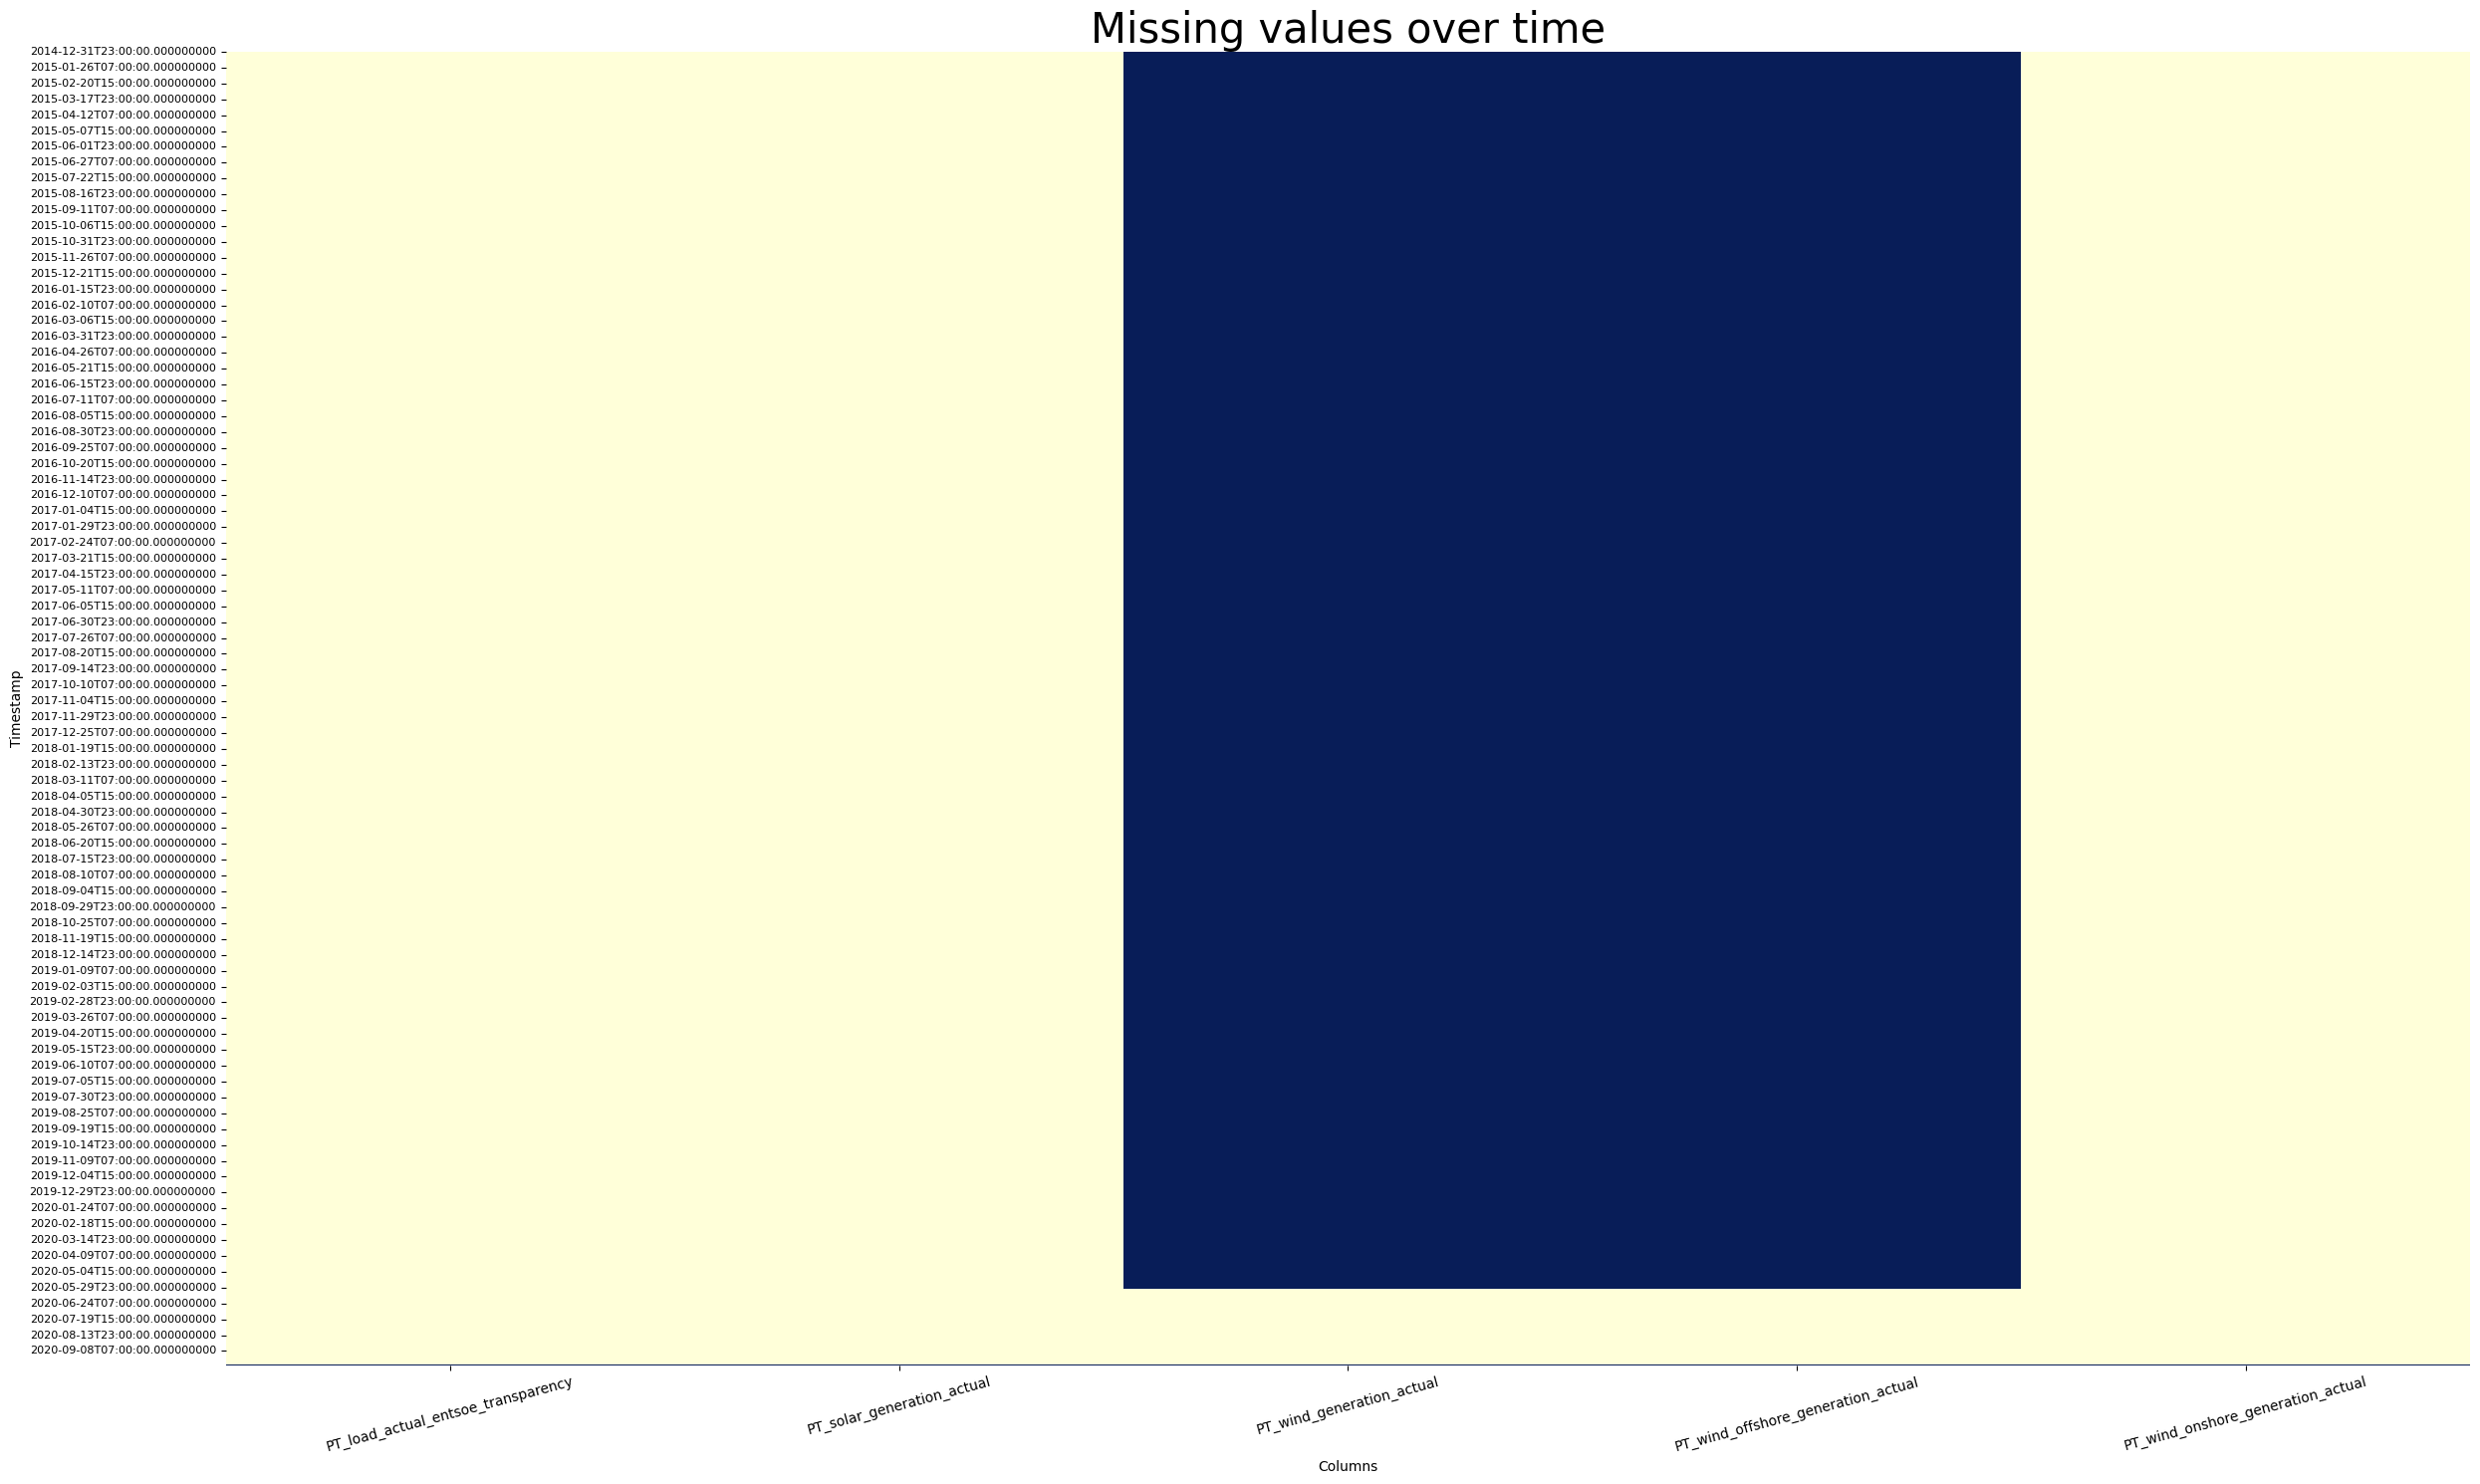

In [247]:
def plot_missings(data, rotation=15):
    plt.figure(figsize=(25, 15))
    sns.heatmap(data.isnull(), cbar=False, cmap='YlGnBu')
    plt.title('Missing values over time', fontsize=30)
    plt.xlabel('Columns')
    plt.ylabel('Timestamp')
    plt.xticks(rotation=rotation, fontsize=10)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

plot_missings(selected_columns)

# Select France

In [285]:
selected_columns = filtered_data.filter(like='FR', axis=1)

# Print or use the selected columns
selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50401 entries, 2014-12-31 23:00:00 to 2020-09-30 23:00:00
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   FR_load_actual_entsoe_transparency  50357 non-null  float64
 1   FR_solar_generation_actual          50386 non-null  float64
 2   FR_wind_onshore_generation_actual   50393 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


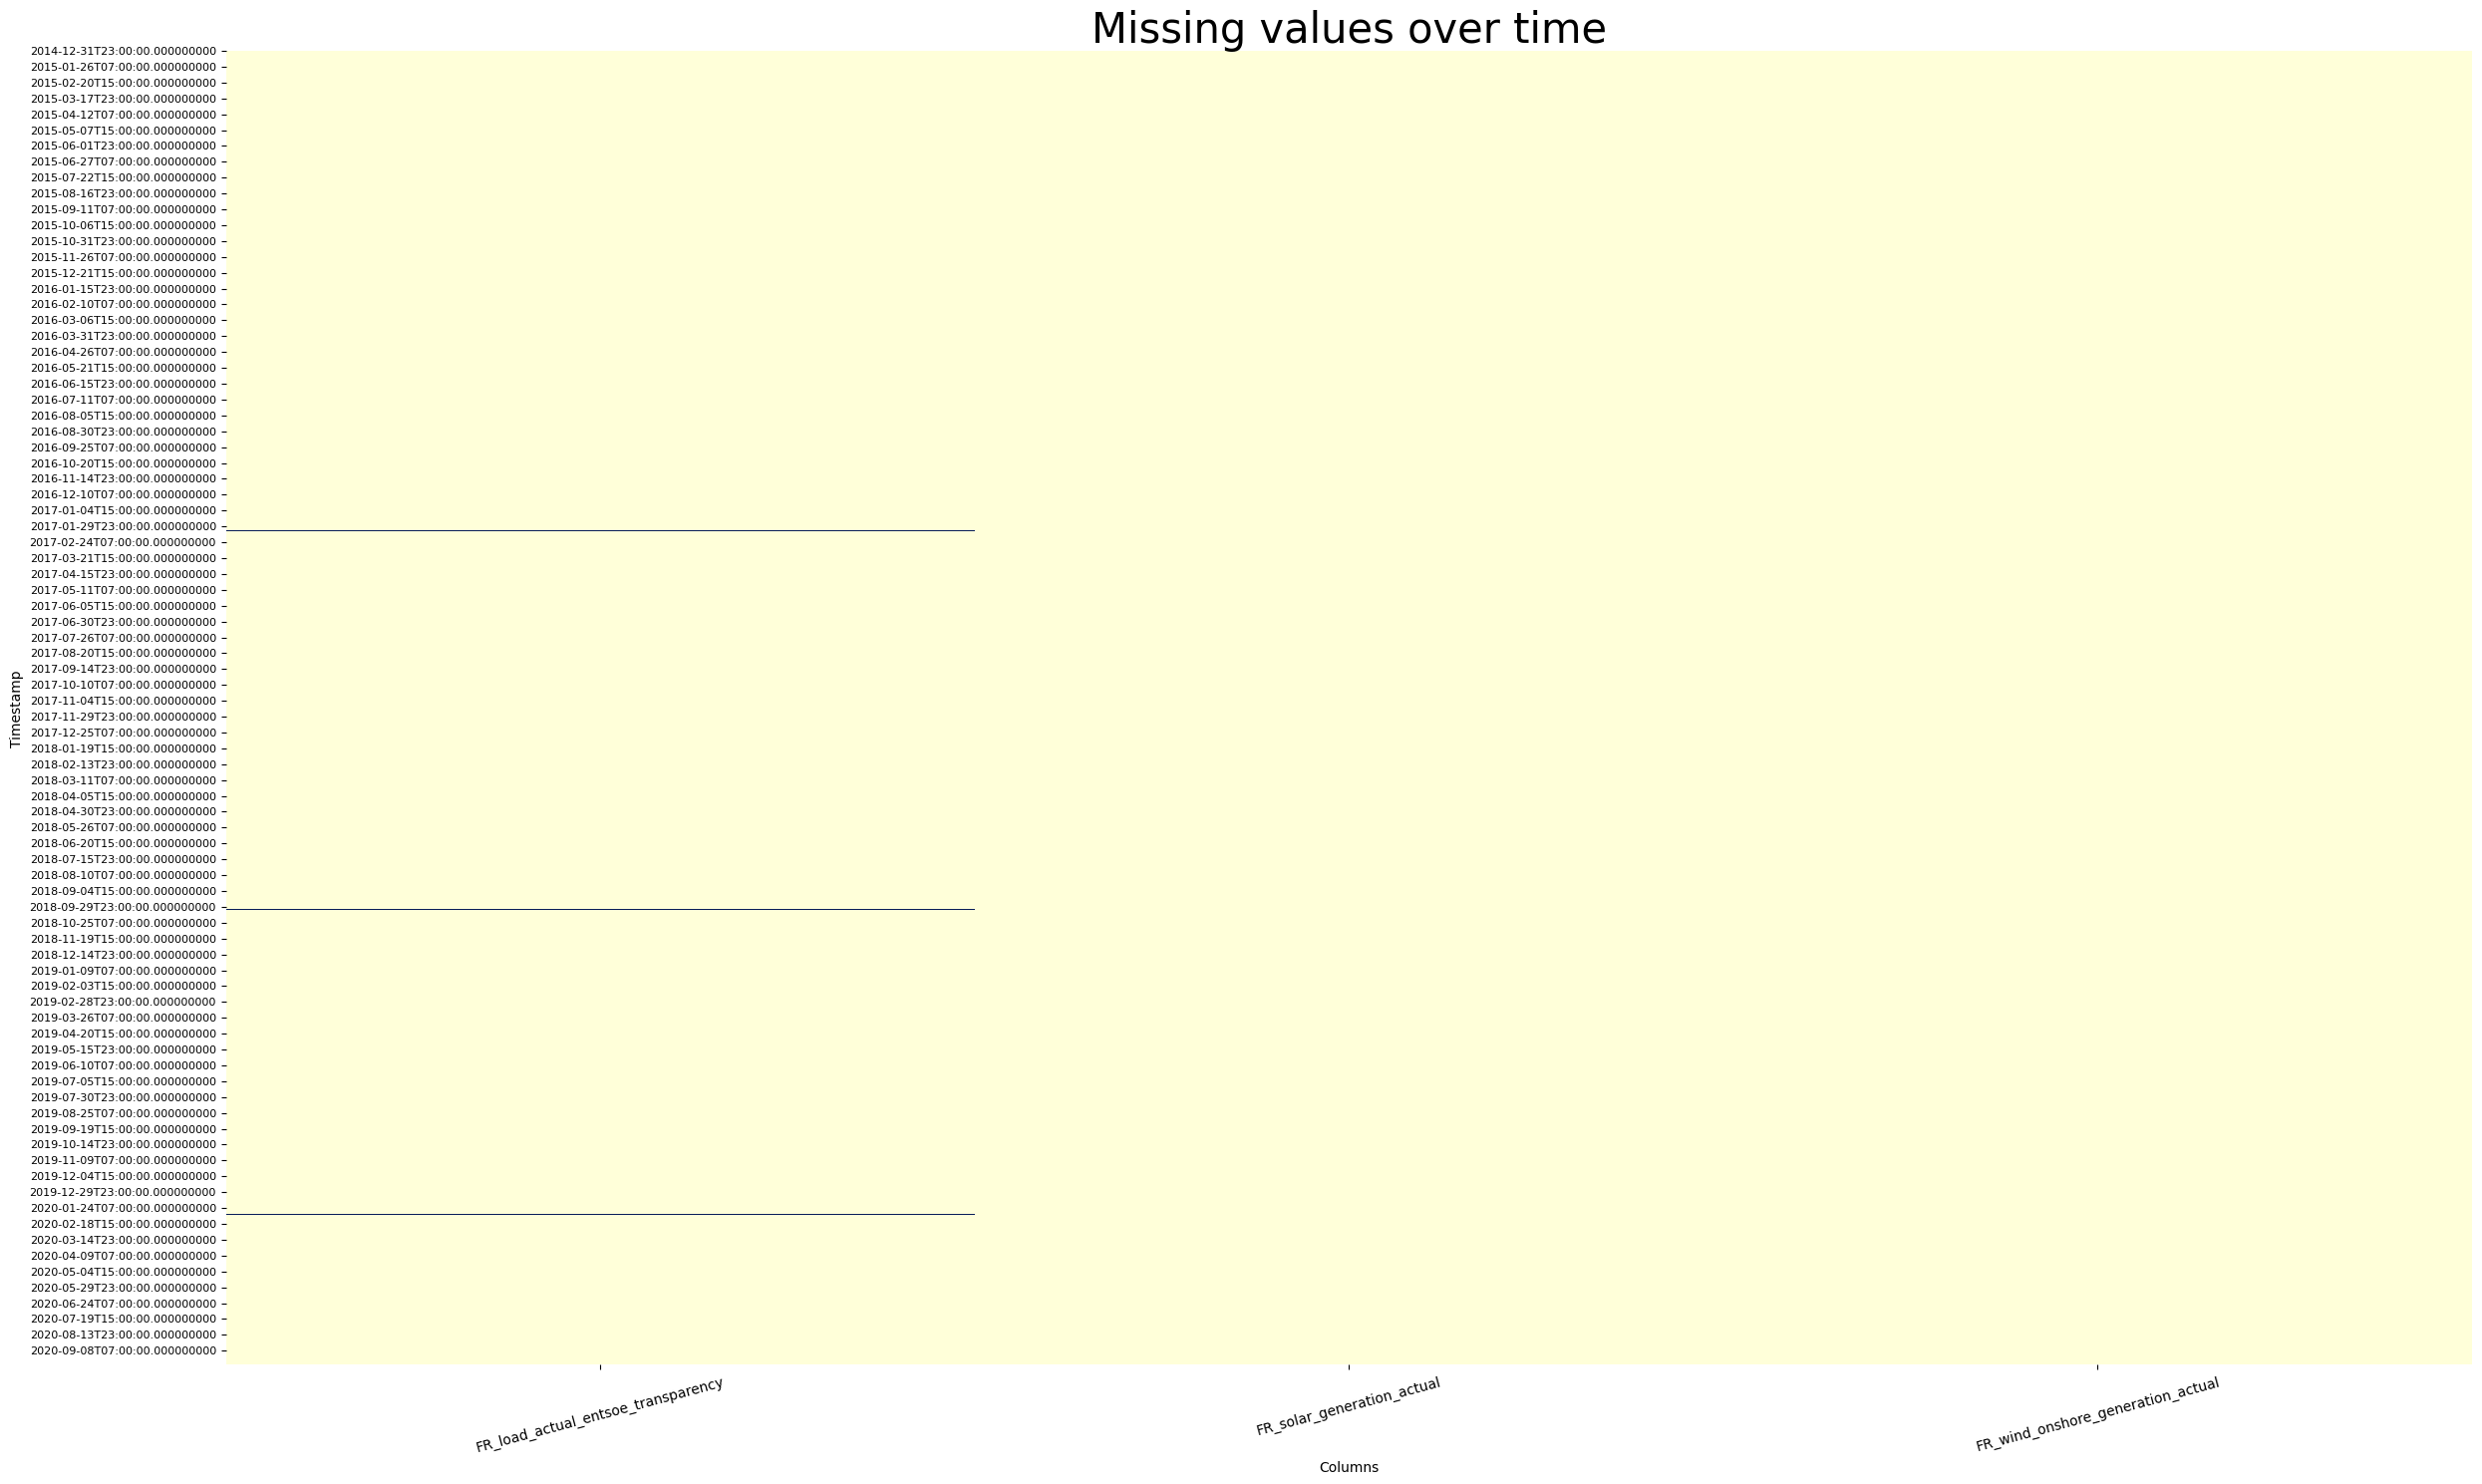

In [280]:
plot_missings(selected_columns)

In [281]:
selected_columns.head()

FR_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                             69773.0   
2015-01-01 02:00:00                             66417.0   
2015-01-01 03:00:00                             64182.0   

                     FR_solar_generation_actual  \
date                                              
2014-12-31 23:00:00                         NaN   
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   

                     FR_wind_onshore_generation_actual  
date                                                    
2014-12-31 23:00:00                                NaN  
2015-01-01 00:00:00                                NaN  
2015-01-01 01:00:00                             1464.0  
2015-01-01 02:00:00                             1543.0  
2015-01-01 03:00:00                             1579.0

In [251]:
selected_columns.tail()

FR_load_actual_entsoe_transparency  \
date                                                      
2020-09-30 19:00:00                             48210.0   
2020-09-30 20:00:00                             48210.0   
2020-09-30 21:00:00                             48058.0   
2020-09-30 22:00:00                             44869.0   
2020-09-30 23:00:00                                 NaN   

                     FR_solar_generation_actual  \
date                                              
2020-09-30 19:00:00                       142.0   
2020-09-30 20:00:00                       142.0   
2020-09-30 21:00:00                       143.0   
2020-09-30 22:00:00                       142.0   
2020-09-30 23:00:00                         NaN   

                     FR_wind_onshore_generation_actual  
date                                                    
2020-09-30 19:00:00                             3632.0  
2020-09-30 20:00:00                             3965.0  
2020-09-30 21:00:00                             4201.0  
2020-09-30 22:00:00                             4428.0  
2020-09-30 23:00:00                                NaN

In [286]:
selected_columns = selected_columns[9: -1]
selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50391 entries, 2015-01-01 08:00:00 to 2020-09-30 22:00:00
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   FR_load_actual_entsoe_transparency  50350 non-null  float64
 1   FR_solar_generation_actual          50386 non-null  float64
 2   FR_wind_onshore_generation_actual   50386 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [287]:
selected_columns_shift = selected_columns.shift(freq='24H')

# Fill missing values with values from the previous day
selected_columns = selected_columns.fillna(selected_columns_shift)

selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50391 entries, 2015-01-01 08:00:00 to 2020-09-30 22:00:00
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   FR_load_actual_entsoe_transparency  50391 non-null  float64
 1   FR_solar_generation_actual          50391 non-null  float64
 2   FR_wind_onshore_generation_actual   50391 non-null  float64
dtypes: float64(3)
memory usage: 2.5 MB


In [274]:
# it is first day of observations
#m_max = selected_columns['FR_solar_generation_actual'].isnull().idxmax()
#m_min = selected_columns['FR_solar_generation_actual'].isnull().idxmin()
#print("Min, max missing index in 'FR_solar_generation_actual':", m_min, m_max)
# selected_data = df[df.index > '2015-01-01']

Min, max missing index in 'FR_solar_generation_actual': 2015-01-01 08:00:00 2015-01-01 01:00:00


In [314]:
selected_columns.to_csv('selected_columns.csv')

# Missing values

In [229]:
# Missing values
missing_values = filtered_data.isnull()

# Calculate percentage of missing values in each column
percentage_missing = (missing_values.sum() / len(filtered_data)) * 100

# Print or inspect the percentage of missing values
print(percentage_missing[percentage_missing > 5])


BE_wind_offshore_generation_actual     7.807385
CY_load_actual_entsoe_transparency    34.662011
CY_wind_onshore_generation_actual     14.479871
HU_solar_generation_actual            82.212655
IT_solar_generation_actual            13.094978
IT_wind_onshore_generation_actual     17.352830
ME_wind_onshore_generation_actual     59.405567
NL_solar_generation_actual            10.029563
PL_solar_generation_actual            91.738259
PT_wind_offshore_generation_actual    94.262019
SK_wind_onshore_generation_actual     80.796016
dtype: float64


In [230]:
print(percentage_missing[percentage_missing < 1])

AT_load_actual_entsoe_transparency    0.001984
AT_solar_generation_actual            0.123013
AT_wind_onshore_generation_actual     0.097220
BE_load_actual_entsoe_transparency    0.001984
BE_solar_generation_actual            0.031745
                                        ...   
SI_load_actual_entsoe_transparency    0.121029
SI_solar_generation_actual            0.019841
SI_wind_onshore_generation_actual     0.043650
SK_load_actual_entsoe_transparency    0.055554
SK_solar_generation_actual            0.775778
Length: 61, dtype: float64


In [208]:
sorted_missings = filtered_data.isna().sum().sort_values(ascending=False)
pd.DataFrame(sorted_missings, columns=['Number of missing values'])

Number of missing values
PT_wind_offshore_generation_actual                     47509
PL_solar_generation_actual                             46237
HU_solar_generation_actual                             41436
SK_wind_onshore_generation_actual                      40722
ME_wind_onshore_generation_actual                      29941
...                                                      ...
DE_load_actual_entsoe_transparency                         1
NL_load_actual_entsoe_transparency                         1
HU_load_actual_entsoe_transparency                         1
BE_load_actual_entsoe_transparency                         1
AT_load_actual_entsoe_transparency                         1

[79 rows x 1 columns]

In [209]:
"""
Separate the columns with big and small amount of missing values
"""
index_missing_big = sorted_missings[sorted_missings > 100].index
index_missing_small = sorted_missings[(sorted_missings <= 100) & (sorted_missings > 15)].index

In [210]:
"""
1. Here are the columns where number of missings is less than 10

2. All first values are nan

3. Almost all of them are nan at the end
"""

filtered_data[sorted_missings[(sorted_missings <= 15)].index]

FR_solar_generation_actual  \
date                                              
2014-12-31 23:00:00                         NaN   
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   
...                                         ...   
2020-09-30 19:00:00                       142.0   
2020-09-30 20:00:00                       142.0   
2020-09-30 21:00:00                       143.0   
2020-09-30 22:00:00                       142.0   
2020-09-30 23:00:00                         NaN   

                     FI_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              8735.4   
2015-01-01 02:00:00                              8626.4   
2015-01-01 03:00:00                              8674.1   
...                                                 ...   
2020-09-30 19:00:00                              8298.5   
2020-09-30 20:00:00                              8012.3   
2020-09-30 21:00:00                              7552.1   
2020-09-30 22:00:00                              7249.3   
2020-09-30 23:00:00                                 NaN   

                     FI_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                                NaN   
2015-01-01 01:00:00                             250.02   
2015-01-01 02:00:00                             264.08   
2015-01-01 03:00:00                             274.47   
...                                                ...   
2020-09-30 19:00:00                             582.01   
2020-09-30 20:00:00                             585.84   
2020-09-30 21:00:00                             519.35   
2020-09-30 22:00:00                             489.83   
2020-09-30 23:00:00                                NaN   

                     DK_solar_generation_actual  SI_solar_generation_actual  \
date                                                                          
2014-12-31 23:00:00                         NaN                         NaN   
2015-01-01 00:00:00                         NaN                         NaN   
2015-01-01 01:00:00                         NaN                         NaN   
2015-01-01 02:00:00                         NaN                         NaN   
2015-01-01 03:00:00                         NaN                         NaN   
...                                         ...                         ...   
2020-09-30 19:00:00                         NaN                        5.32   
2020-09-30 20:00:00                         NaN                        5.57   
2020-09-30 21:00:00                         NaN                        5.58   
2020-09-30 22:00:00                         NaN                        5.61   
2020-09-30 23:00:00                         NaN                         NaN   

                     FR_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                                NaN   
2015-01-01 01:00:00                             1464.0   
2015-01-01 02:00:00                             1543.0   
2015-01-01 03:00:00                             1579.0   
...                                                ...   
2020-09-30 19:00:00                             3632.0   
2020-09-30 20:00:00                             3965.0   
2020-09-30 21:00:00                             4201.0   
2020-09-30 22:00:00                             4428.0   
2020-09-30 23:00:00                                NaN   

                     BE_wind_onshore_generation_act

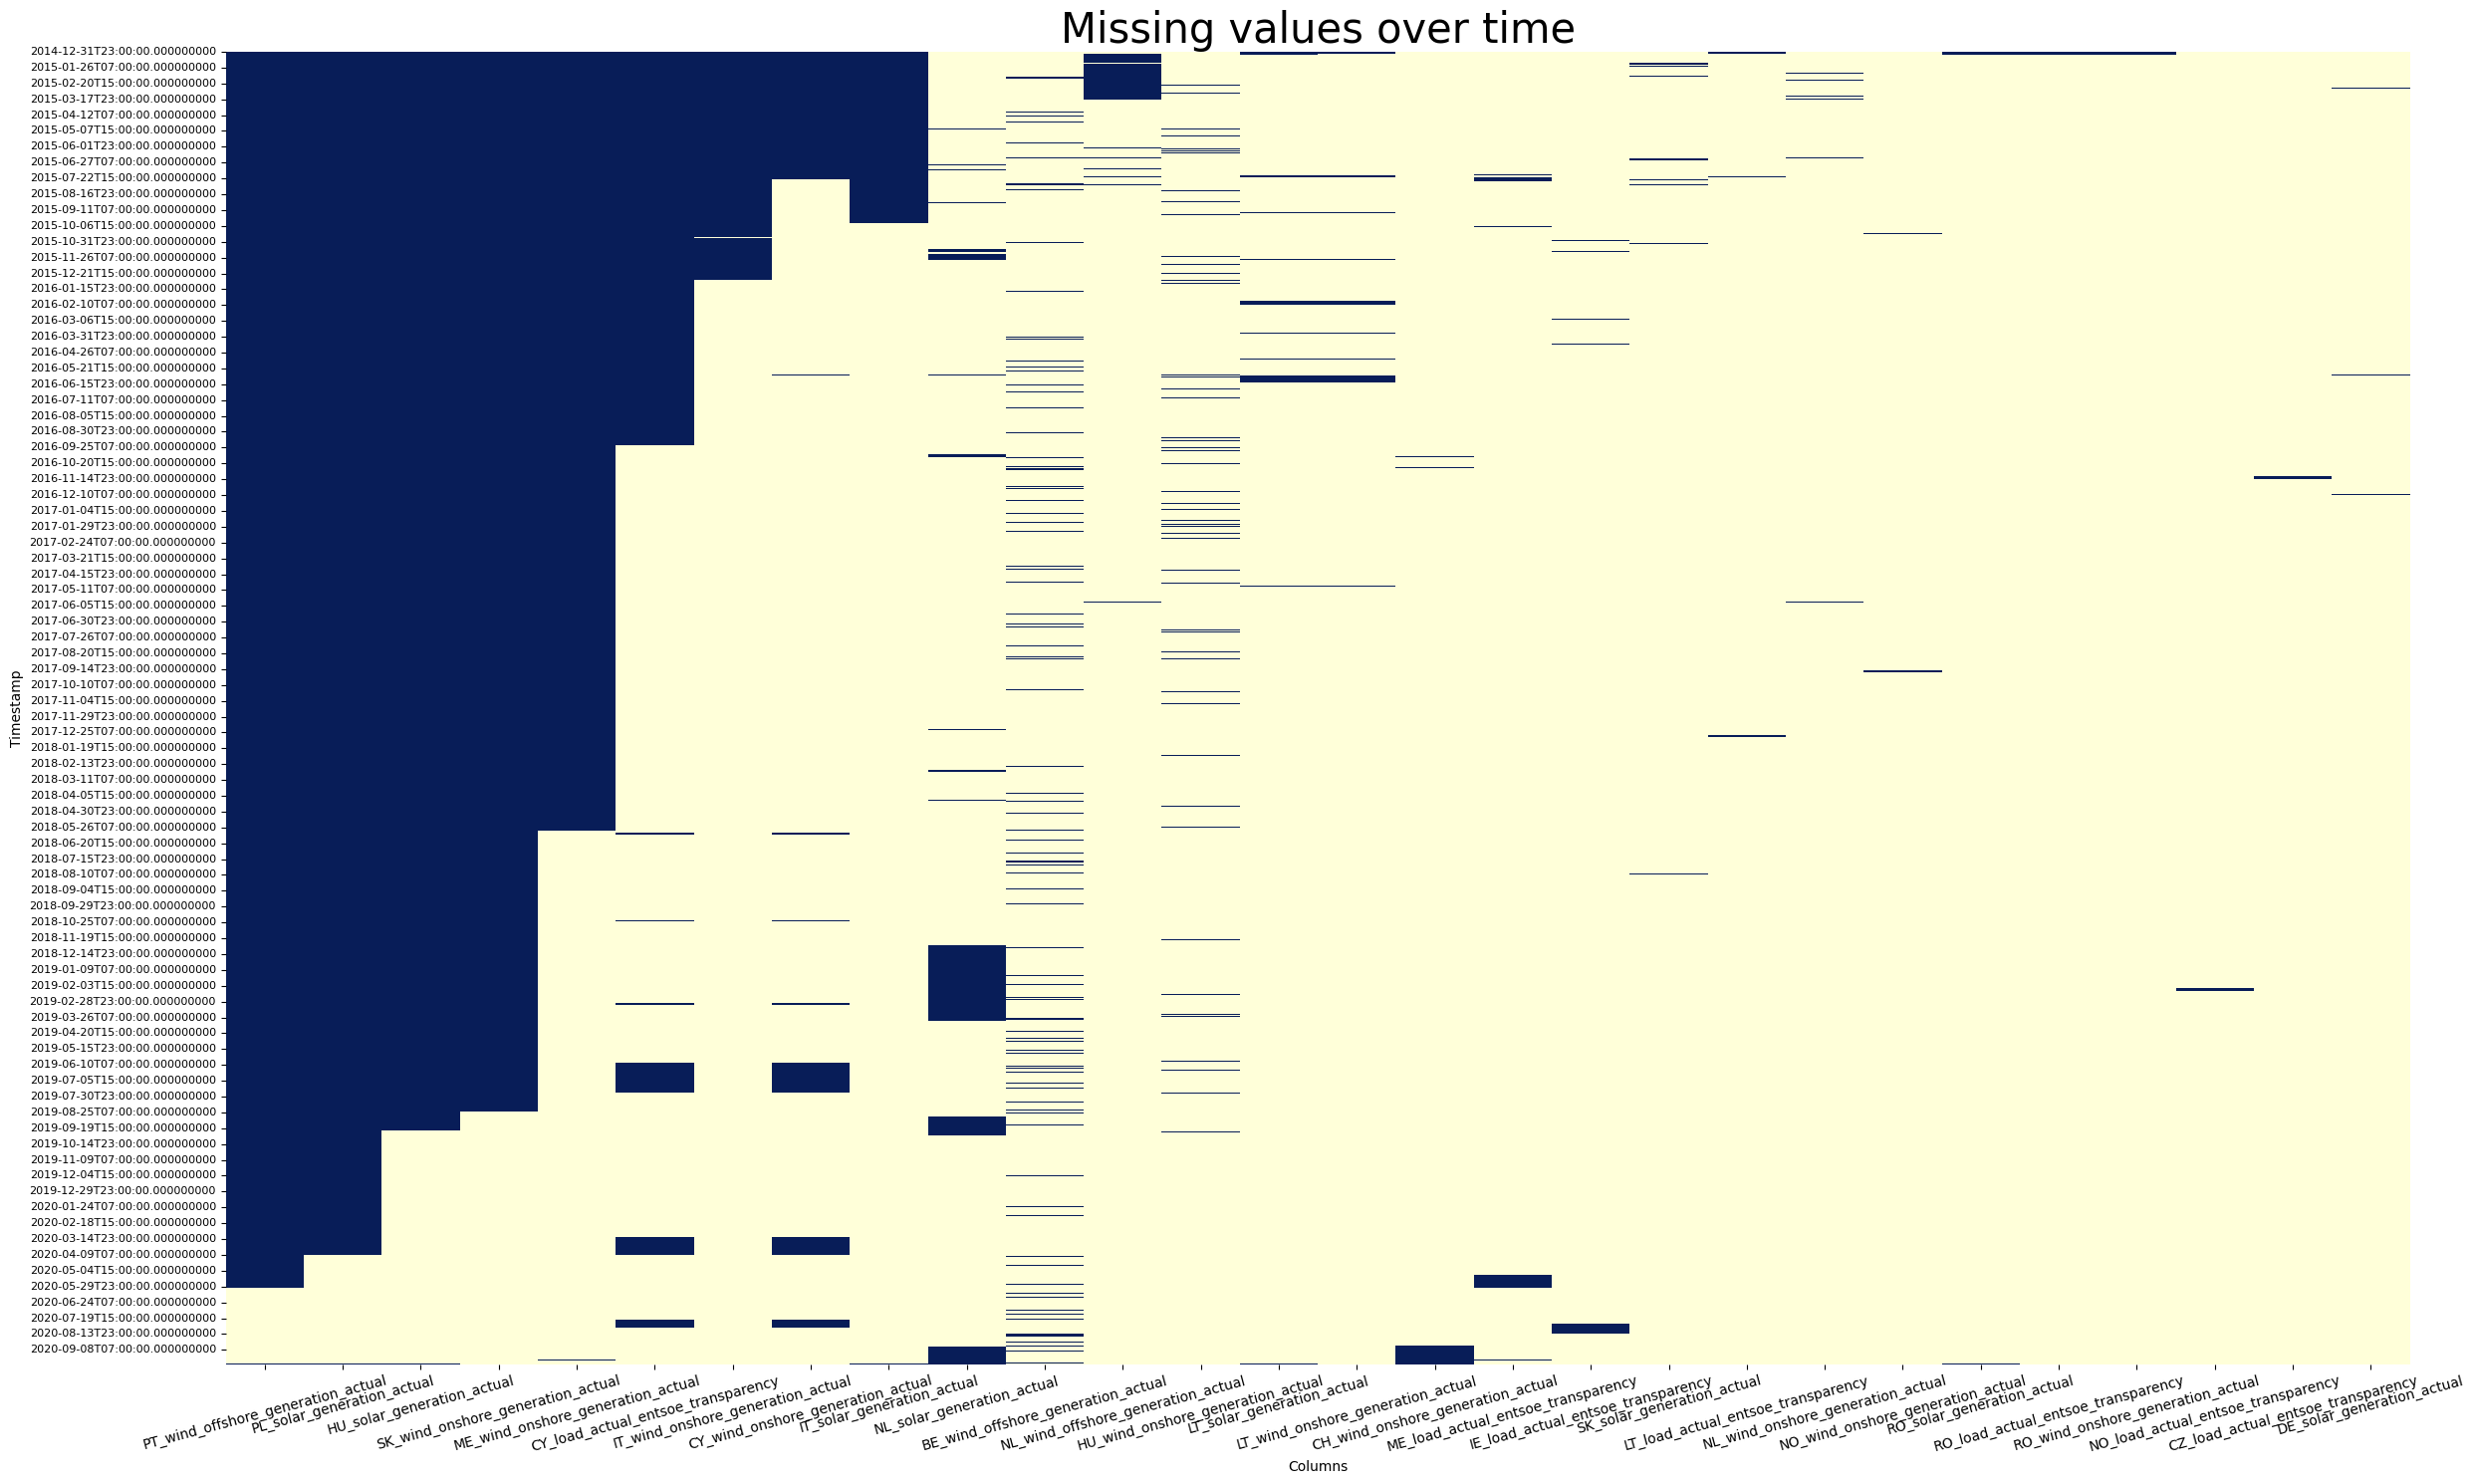

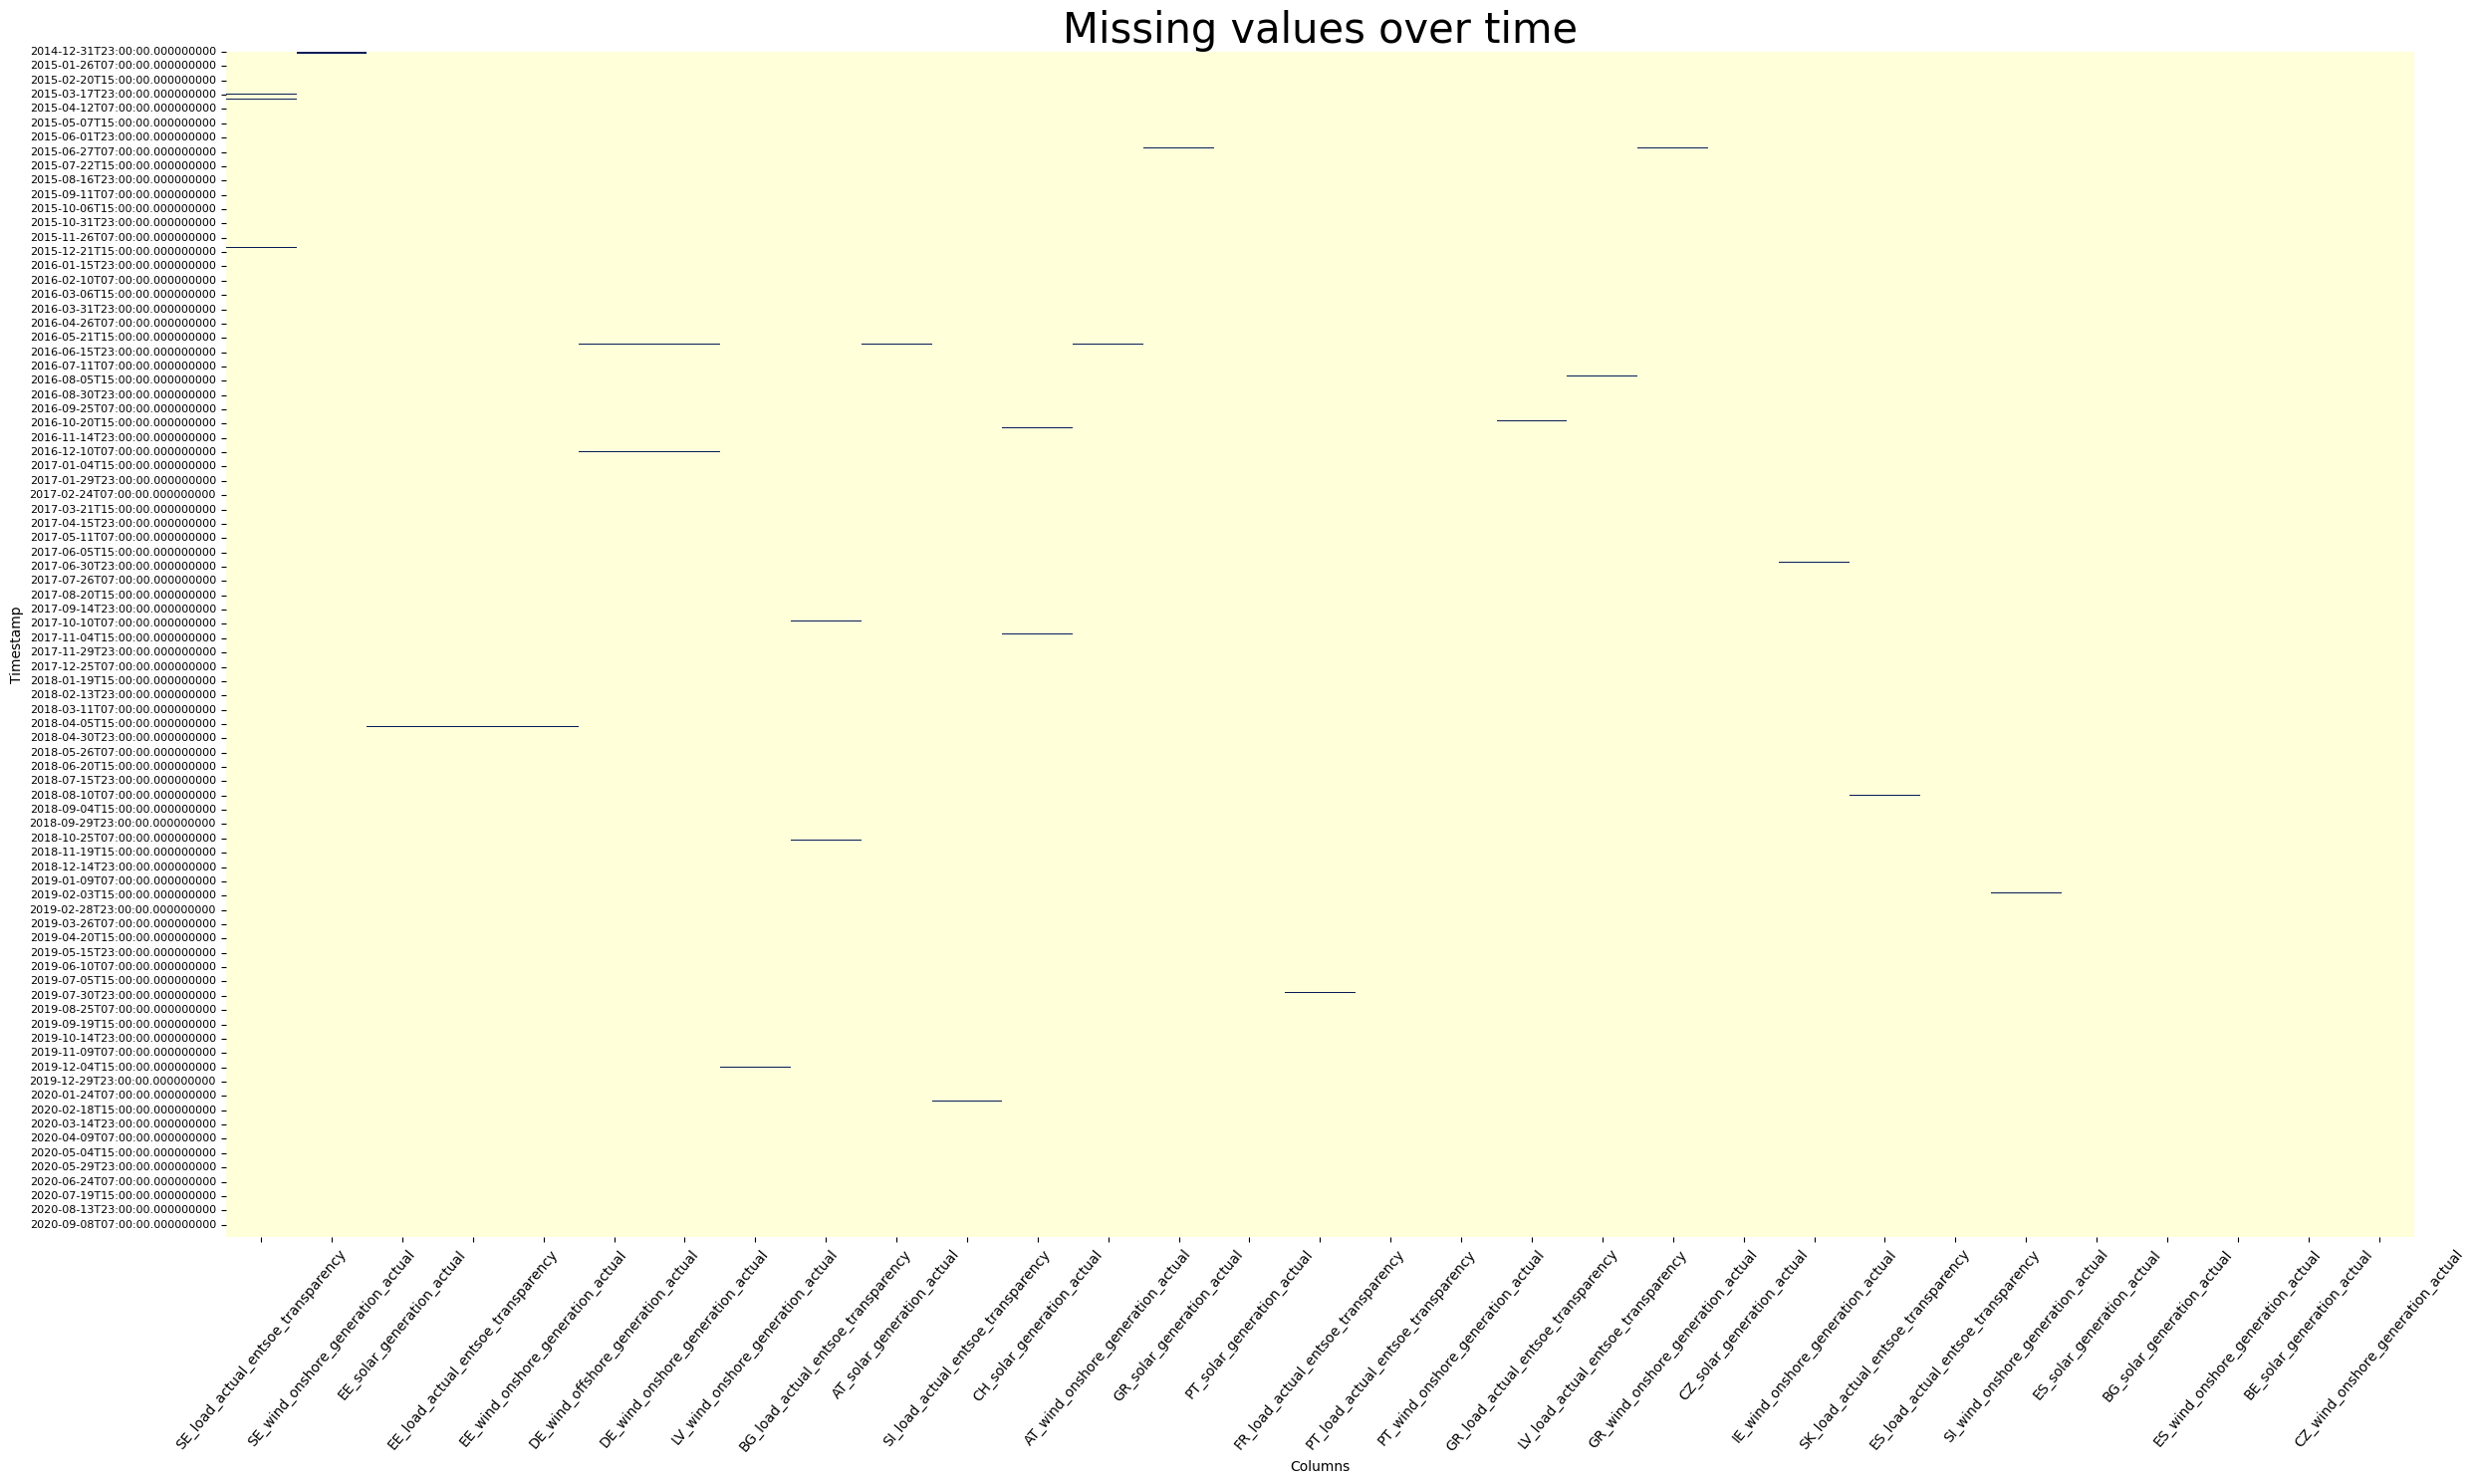

In [211]:
# Function for plot with missing values over time

def plot_missings(data, rotation=15):
    plt.figure(figsize=(25, 15))
    sns.heatmap(data.isnull(), cbar=False, cmap='YlGnBu')
    plt.title('Missing values over time', fontsize=30)
    plt.xlabel('Columns')
    plt.ylabel('Timestamp')
    plt.xticks(rotation=rotation, fontsize=10)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

plot_missings(filtered_data[index_missing_big])
plot_missings(filtered_data[index_missing_small], rotation=50)

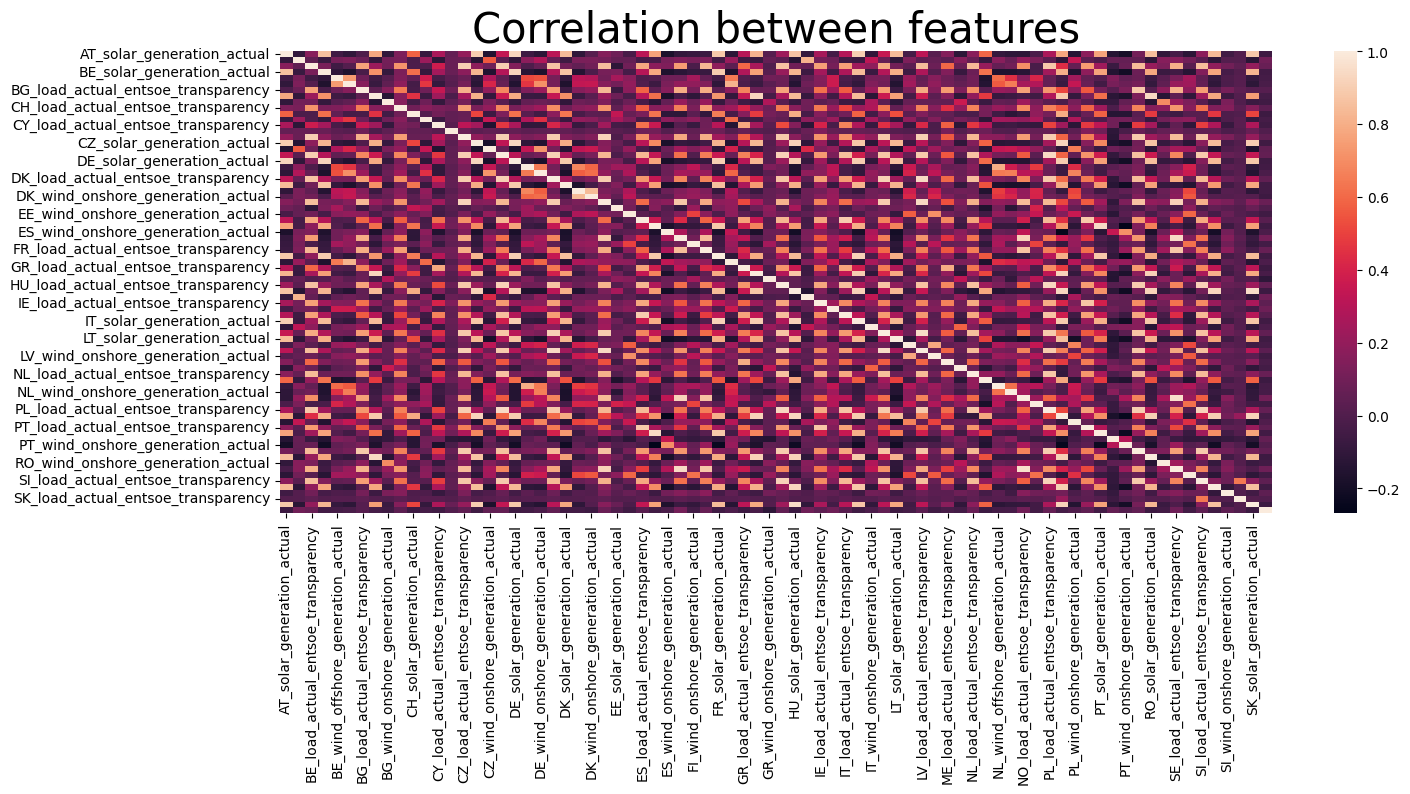

In [212]:
plt.figure(figsize=(16, 6))
sns.heatmap(filtered_data.iloc[:, 1:].corr()) # > 0.8, 
            #vmin=-1, vmax=1, annot=True, cmap='viridis')
plt.title('Correlation between features', fontsize=30);

In [215]:
cols = filtered_data.columns
len(cols) / 2

39.5

In [92]:
# TODO: fillna values other than 0
filtered_data.fillna(0, inplace=True)

/var/folders/wd/nrqjtvlj6gdc6x_gdm4wxjwr0000gn/T/ipykernel_19180/1084610520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(0, inplace=True)


In [93]:
cols = np.array(filtered_data.columns.sort_values()).reshape(-1, 2)
cols, len(cols)

(array([['AT_load_actual_entsoe_transparency',
         'AT_solar_generation_actual'],
        ['BE_load_actual_entsoe_transparency',
         'BE_solar_generation_actual'],
        ['BE_wind_generation_actual',
         'BG_load_actual_entsoe_transparency'],
        ['BG_solar_generation_actual',
         'CH_load_actual_entsoe_transparency'],
        ['CH_solar_generation_actual',
         'CY_load_actual_entsoe_transparency'],
        ['CZ_load_actual_entsoe_transparency',
         'CZ_solar_generation_actual'],
        ['DE_load_actual_entsoe_transparency',
         'DE_solar_generation_actual'],
        ['DE_wind_generation_actual',
         'DK_load_actual_entsoe_transparency'],
        ['DK_solar_generation_actual', 'DK_wind_generation_actual'],
        ['EE_load_actual_entsoe_transparency',
         'EE_solar_generation_actual'],
        ['ES_load_actual_entsoe_transparency',
         'ES_solar_generation_actual'],
        ['FI_load_actual_entsoe_transparency',
         'FR_loa

In [94]:
"""
Plot trendlines
"""
cols = np.array(filtered_data.columns.sort_values()).reshape(-1, 2)

for i in range(26):
    for j, column in enumerate(list(cols[i])):
        print(i, j, column)

0 0 AT_load_actual_entsoe_transparency
0 1 AT_solar_generation_actual
1 0 BE_load_actual_entsoe_transparency
1 1 BE_solar_generation_actual
2 0 BE_wind_generation_actual
2 1 BG_load_actual_entsoe_transparency
3 0 BG_solar_generation_actual
3 1 CH_load_actual_entsoe_transparency
4 0 CH_solar_generation_actual
4 1 CY_load_actual_entsoe_transparency
5 0 CZ_load_actual_entsoe_transparency
5 1 CZ_solar_generation_actual
6 0 DE_load_actual_entsoe_transparency
6 1 DE_solar_generation_actual
7 0 DE_wind_generation_actual
7 1 DK_load_actual_entsoe_transparency
8 0 DK_solar_generation_actual
8 1 DK_wind_generation_actual
9 0 EE_load_actual_entsoe_transparency
9 1 EE_solar_generation_actual
10 0 ES_load_actual_entsoe_transparency
10 1 ES_solar_generation_actual
11 0 FI_load_actual_entsoe_transparency
11 1 FR_load_actual_entsoe_transparency
12 0 FR_solar_generation_actual
12 1 GR_load_actual_entsoe_transparency
13 0 GR_solar_generation_actual
13 1 HU_load_actual_entsoe_transparency
14 0 HU_solar_g

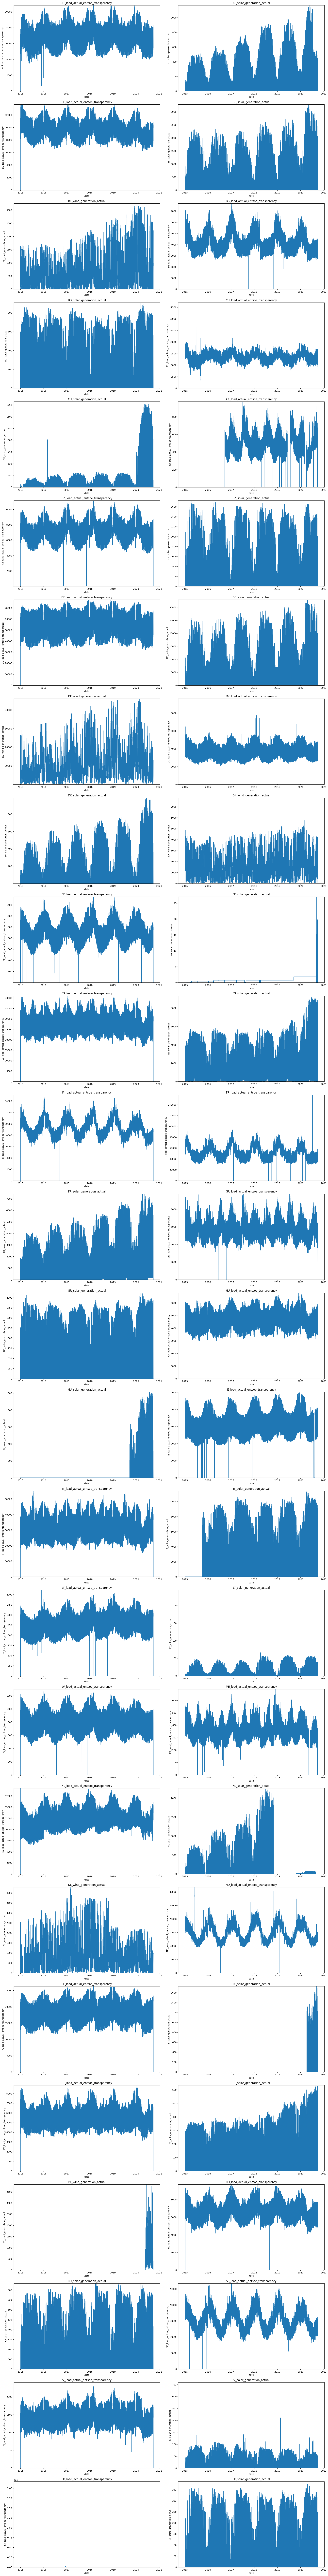

In [95]:
"""
Plot trendlines
"""
cols = np.array(filtered_data.columns.sort_values()).reshape(-1, 2)

fig, axes = plt.subplots(26, 2, figsize=(20, 6*26))#, sharey=True) # create a size and define the number + positions for subplots on the window

for i in range(26):
    for j, column in enumerate(list(cols[i])):
        # Note: index must be pd.DatetimeIndex! (otherwise it will create a value on x-axis 
        # for each separate observation)
        sns.lineplot(ax=axes[i, j], data = filtered_data, x=filtered_data.index, y=filtered_data[column])
        axes[i, j].set_title(column)  # Set subplot title
        axes[i, j].set_ylim(filtered_data[column].min(), filtered_data[column].max())
    
plt.tight_layout()
plt.show()


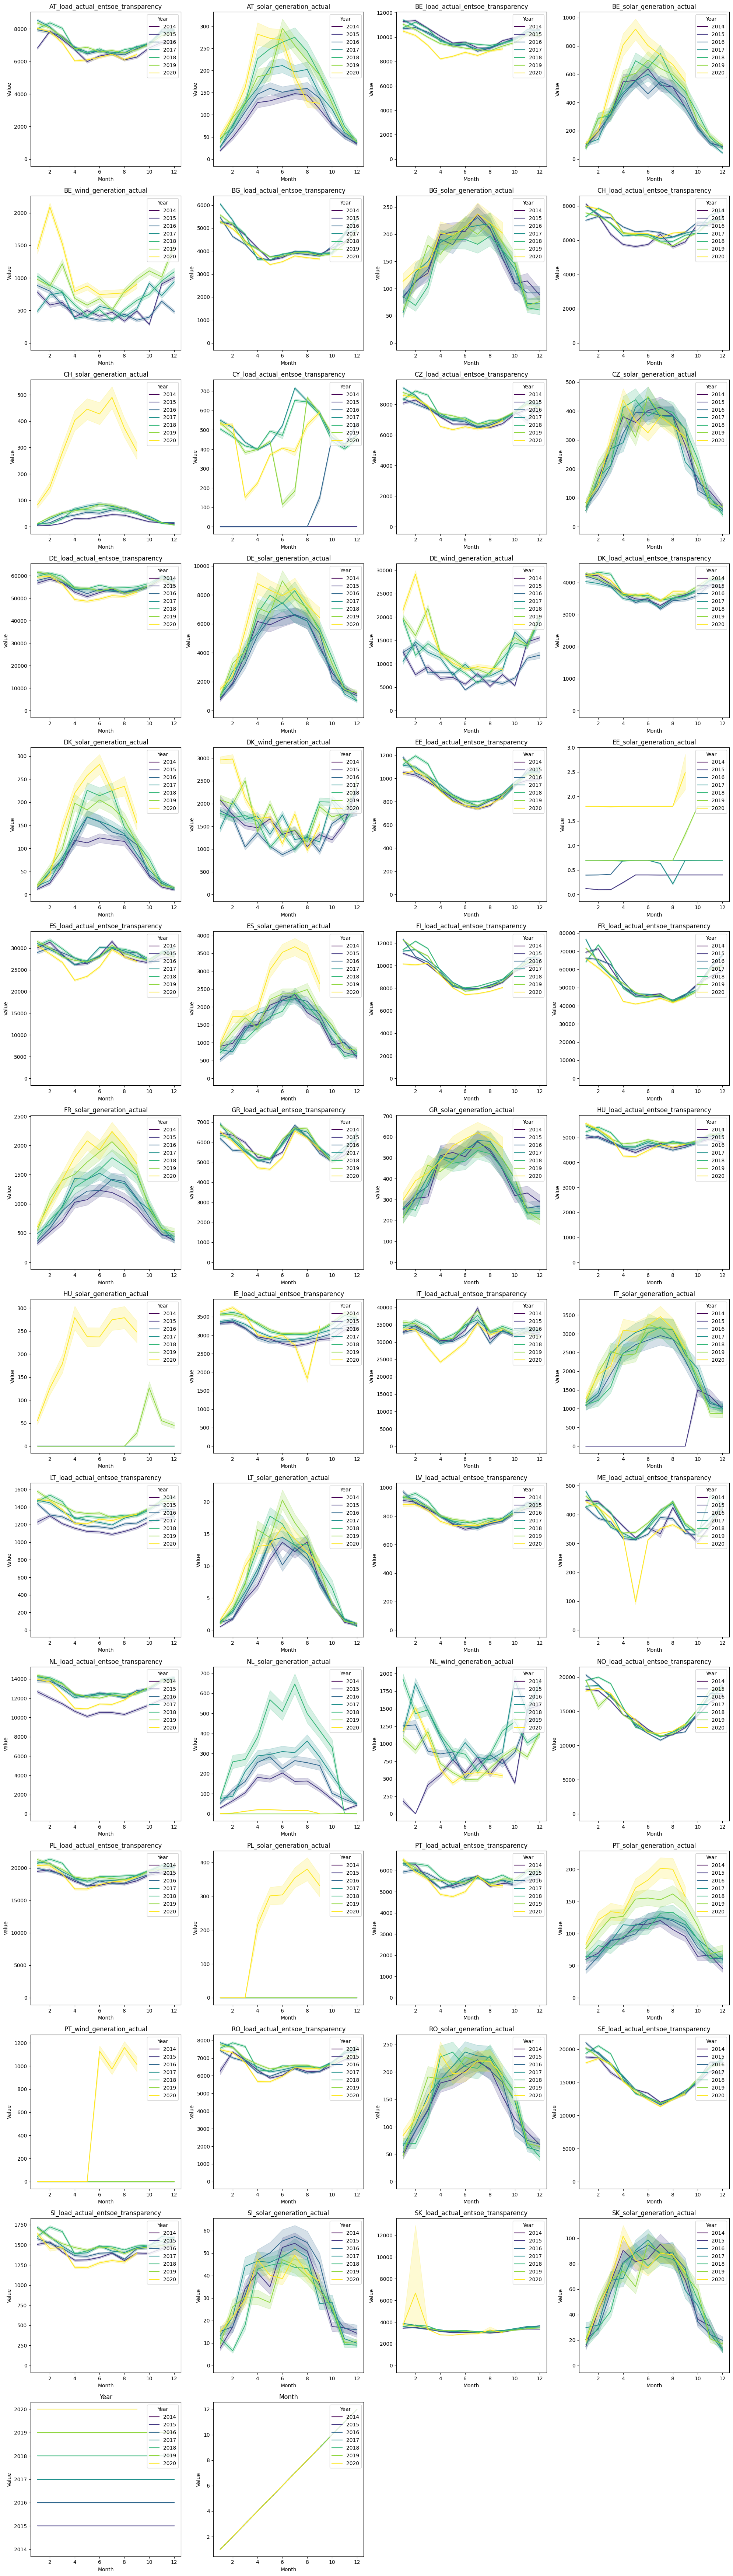

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract year and month from the index
filtered_data.loc[:, 'Year'] = filtered_data.index.year
filtered_data.loc[:, 'Month'] = filtered_data.index.month

# Plot lines for each variable per year
num_cols = 4
num_rows = (len(filtered_data.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

for i, ax in enumerate(axes.flat):
    if i < len(filtered_data.columns):
        col = filtered_data.columns[i]
        sns.lineplot(ax=ax, data=filtered_data, x='Month', y=col, hue='Year', palette='viridis')
        ax.set_title(f'{col}')
        ax.set_xlabel('Month')
        ax.set_ylabel('Value')
        ax.legend(title='Year', loc = 'upper right')
    else:
        ax.axis('off')  

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract year and month from the index
filtered_data.loc[:, 'Day'] = filtered_data.index.day

# Plot lines for each variable per year
num_cols = 4
num_rows = (len(filtered_data.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

for i, ax in enumerate(axes.flat):
    if i < len(filtered_data.columns):
        col = filtered_data.columns[i]
        sns.lineplot(ax=ax, data=filtered_data, x='Month', y=col, hue='Year', palette='viridis')
        ax.set_title(f'{col}')
        ax.set_xlabel('Month')
        ax.set_ylabel('Value')
        ax.legend(title='Year', loc = 'upper right')
    else:
        ax.axis('off')  

plt.tight_layout()
plt.show()


# Interactive graphs with PlotLy

In [ ]:
import plotly.graph_objects as go

# Iterate over each variable
for variable in filtered_data.columns:
    plots = []  # List to store the plots for each variable
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=filtered_data.index, y=filtered_data[variable], mode='lines'))
    fig.update_layout(title=f'{variable}', xaxis_title='Date', yaxis_title='Value')
            
    # Add the plot to the list of plots
    plots.append(fig)
    
    # Display the plots for the current variable
    for plot in plots:
        plot.show()
